In [2]:
import torch

In [4]:
from torch import nn,functional as f

In [6]:
torch.cuda.device_count()

1

In [13]:
def try_gpu(i=0):
    if torch.cuda.device_count()>=i+1:
        return torch.device(f'cuda:{i}')
    return torch.device('cpu')

In [14]:
try_gpu()

device(type='cuda', index=0)

In [18]:
def try_all_gpus():
    device_count=torch.cuda.device_count()
    devices=[torch.device(f'cuda:{i}') for i in range(device_count)]
    return devices if devices else [torch.device('cpu')]

In [19]:
try_all_gpus()

[device(type='cuda', index=0)]

By default, tensors are created on the CPU. We can query the device where the tensor is located.

In [23]:
x=torch.tensor([1,2])
x.device

device(type='cpu')

In [27]:
x=torch.tensor([1,2],device=try_gpu())
x.device

device(type='cuda', index=0)

In [30]:
x=torch.ones(5,5,device=try_gpu(0))
x.device

device(type='cuda', index=0)

Do not perform operation between tensors that are on different GPU's.Make sure all the tensors in the perations are in sampe GPU(if you have multiple GPU)
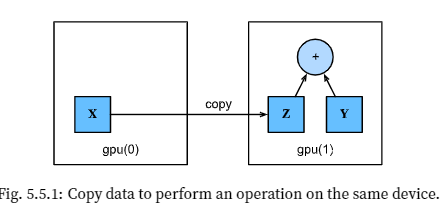


In [34]:
x.cuda(0) is x

True

In [38]:
class MLP(nn.Module):
    def __init__(self,inp_shape,out_shape):
        super().__init__()
        self.hidden=nn.Linear(inp_shape,100)
        self.output=nn.Linear(100,out_shape)
    def forward(self,x):
        return self.output(self.hidden(x))
X=torch.randn(10,100)
net=MLP(X.shape[1],20)
net.to(device=try_gpu())



MLP(
  (hidden): Linear(in_features=100, out_features=100, bias=True)
  (output): Linear(in_features=100, out_features=20, bias=True)
)

The deep learning framework requires all input data for calculation to be on the same device,be it CPU or the same GPU.

In [39]:
net(X)

RuntimeError: ignored

In [40]:
X.device

device(type='cpu')

In [42]:
y=torch.randn(10,100,device=try_gpu())

In [43]:
net(y)

tensor([[-0.0218, -0.1564,  0.0273, -0.0823,  0.0083,  0.5026,  0.0026,  0.8022,
          0.3551,  0.1098, -0.3133, -0.5927, -0.4626,  0.0938, -0.0926, -0.2344,
         -0.2105,  0.1304,  0.2058,  0.3295],
        [ 0.0581,  0.4261, -0.1857, -0.2923, -0.1734,  0.0939, -0.3461,  0.5474,
          0.4834, -0.1343,  0.3538, -0.2760, -0.2505, -0.0105, -0.3505,  0.0679,
         -0.1309,  0.4405,  0.3501,  0.1539],
        [ 0.3105,  0.8526, -0.2355,  0.0471,  0.0848, -0.0897, -0.0332, -0.7703,
         -0.3713,  0.1263,  0.2643, -0.0947,  0.1964, -0.1522,  0.5815,  0.0903,
         -0.2561,  0.0131, -0.0605,  0.0286],
        [ 0.6257,  0.0729, -0.0088, -1.0626,  0.0151,  0.0722, -0.3288,  0.5315,
          0.7714, -0.5391,  0.3136, -0.1515, -0.4155, -0.1322,  0.1734, -0.4575,
          0.1127, -0.0558,  0.3485,  1.1509],
        [-0.5029,  0.3826,  0.4526,  0.2281,  0.2596,  0.0194, -0.0245, -0.3446,
          0.3132,  0.2315, -0.5065,  0.2754,  0.1403,  0.7607, -0.1297,  0.1613,
      

In [53]:
for name,param in net.named_parameters():
    print(name)

hidden.weight
hidden.bias
output.weight
output.bias
